In [159]:
#Proj4 Victor Zhang
import numpy as np
import matplotlib.pyplot as plt

n_iters = 25

def Gaus_kernel(x, y, param,L=True): #L:w/ reshape, cannot resolve w/ squeeze
    #equ 6.23
    if L:
        x = x.reshape(np.shape(x)+(1,))
    return np.exp(-0.5 * np.sum((x - y) ** 2, axis=-1)/param)

class GP(object):

    def __init__(self, beta, sigma = 0.1):
        self.beta = beta
        self.sigma = sigma
    #calc var & var^-1
    def fit(self, X, t):
        X = X[:, None]
        k = Gaus_kernel(X, X, self.sigma)
        self.X = X
        self.t = t
        I = np.eye(np.size(X))
        self.var = I / self.beta + k
        self.prec = np.linalg.inv(self.var)

    #get mean & std for param given test set X
    def predict(self, X):
        X = X[:, None]
        K = Gaus_kernel(X, self.X, self.sigma)
        mean = K @ self.prec @ self.t #6.66
        var = (Gaus_kernel(X, X, self.sigma,False)+ 1 / self.beta- np.sum(K @ self.prec * K, axis=1)) #6.67, c in upper text
        return mean.flatten(), np.sqrt(var.flatten())

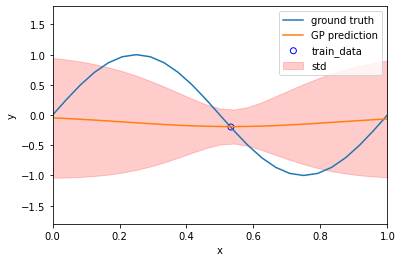

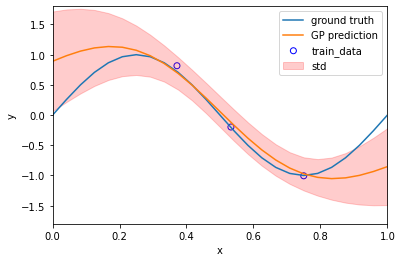

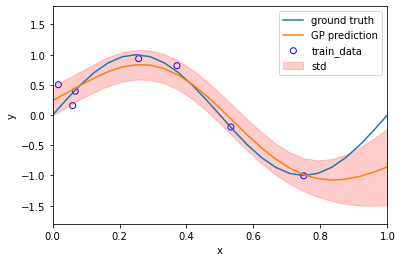

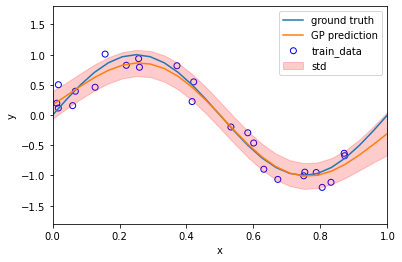

In [160]:
#generate data, copied from proj 2
np.random.seed(767442)
x1 = np.random.uniform(0,0.9,n_iters)
t = np.sin(2 * np.pi * x1)
g_noise = np.random.normal(0,0.2,n_iters)
t = t + g_noise
x = np.linspace(0, 1, n_iters)
y_test = np.sin(2 * np.pi * x)

#initialize Gaussian Process class
gpp = GP(beta=25) # same beta from proj2

for begin, end in [[0, 1], [0, 3], [0, 7], [0, 25]]:
    gpp.fit(x1[begin: end], t[begin: end])  #fit to trainning set
    y, std = gpp.predict(x) # get mean & std
    #plot
    plt.scatter(x1[begin: end], t[begin: end], facecolor="none", edgecolor="b",label="train_data")
    plt.plot(x, y_test, label="ground truth")
    plt.plot(x, y, label="GP prediction")
    plt.fill_between(x, y - std, y + std, color="red", label="std", alpha = 0.2)
    plt.ylim(-1.8, 1.8)
    plt.xlim(0, 1)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()